# POS Steady-State Modelling

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
lineS = [0, 35]
Cmin = 20
Cmax = 40

In [3]:
msrS = [0,2,5,6,8,10,22,23,25,27]
msrC = [40, 30, 27, 26,22,24,29,25,22,21]

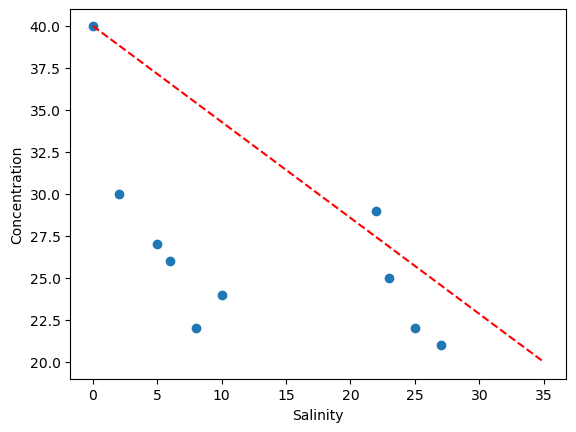

In [4]:
plt.plot(lineS, [Cmax, Cmin], c='r', linestyle = '--')
plt.scatter(msrS, msrC)
plt.xlabel('Salinity')
plt.ylabel('Concentration')
plt.show()

# Weiss, 1970 : Computation of oxygen saturation

In [5]:
'''
T is in Celsius
S in permille
P in atm
'''
def oxygen_weiss(T,S,P=1):
    T += 273.15 #converting into Kelvin
    
    
    A1 = -173.4292
    A2 = 249.6339
    A3 = 143.3483
    A4 = -21.8492
    B1 = -0.033096
    B2 = 0.014259
    B3 = -0.0017000
    
    C = A1 + A2*(100/T) + A3*np.log(T/100) + A4*(T/100) + S*(B1 + B2*(T/100) + B3*(T/100)**2) #mL/L
    C = np.exp(C)
    print(C, 'mL/L')
    #convert into mg/L
    #P = 1
    V = (C/1000)
    R = 0.0821
    
    n = (P*V)/(R*T)
    
    #print(n, 'mol/L')
    m = n*32.0*(1000) # convert from mol/L to mg/L 
    #print(m, 'mg/L')
    return m
    

In [6]:
tt = oxygen_weiss(0,20) 
print(tt, 'mg/L')

8.913135352154113 mL/L
12.718506550162909 mg/L


# relationship of Weiss and Price (1980).
Determine the N$_2$0 saturation. https://doi.org/10.1016/0304-4203(80)90024-9

## N2O saturation

In [7]:
def weiss_relation(P,T,S) :
    

    TK = 273.15
    T += TK
    #S = 35
    x = 334.5*10**-9
    
    A1 = -165.8806  
    A2 = 222.8743
    A3 = 92.0792
    A4 = -1.48425
    B1 = - 0.056235
    B2 = 0.031619 
    B3 = - 0.0048472 

    F = A1 + A2*(100/T) + A3*np.log(T/100) + A4*(T/100)**2 + S*(B1 + B2*(T/100) + B3*(T/100)**2)
    F = np.exp(F)
    
    C = x * F
    print(C, 'mol.L')
    
    return C

In [8]:
C = weiss_relation(1, 5,35)

1.3061872568332997e-08 mol.L


### Calculating the N2O Flux

In [9]:
'''
M = N2O measurement in mol.L**-1
t = Temperature in celcius
S = Salinity in PSU
u = wind speed (m/s)
A = surface area (default = 1 m**2)
P = Pressure (1 atm)
'''

def Wanninkhof(M, t, S, u=5, A=1, P=1) :

    kw = 2.0 + 0.24*u**2
    Sc = 2301.1 - 151.1*t + 4.7364*t**2 - 0.059431*t**3 #Wanninkhof 1992

    k = kw * (Sc/600)**-.5 #in cm/hour
    k = k/((3600)*100) #convert into m/s
    
    C = weiss_relation(P, t, S)
    
    
    F = k*A*((M-C)*1000) #*1000 to convert in m^3
    
    print(F*60*60*24*10**6, 'µmol/m²/day')
    print(F, 'mol/m²/s')
    return F 

In [10]:
Wanninkhof(70*10**-9,10,35)

1.0874729136800223e-08 mol.L
80.12739638825968 µmol/m²/day
9.274004211604129e-10 mol/m²/s


9.274004211604129e-10

### Importing temperature, salinity and [N2O] data

In [11]:
root = 'D:/GitHub/PlanktonOfSchelde/'

In [12]:
df = pd.read_csv(root+'data/GC-DATA.csv', delimiter=';', decimal=',')

In [13]:
df

,Station,Latitude (N),Longitude (E),date,Tmean (°C),Salinity PSU,N2O (nM),NH4 (µmol/L),NOx (µmol/L),O2 dissous winkler (mg/L),method
0,S01,51.416033,3.583233,10-03-2023,7.00,27.81,15.23,5.98,104.17,7.46,CTD Niskin bottle
1,S01B,51.415917,3.571033,11-03-2023,6.90,29.70,18.03,4.97,61.85,7.12,CTD Niskin bottle
2,S04,51.344417,3.846533,10-03-2023,6.89,22.38,19.40,5.72,133.47,7.79,seawater tap
3,S09,51.371600,4.082783,11-03-2023,7.29,11.04,27.88,5.61,231.12,7.31,CTD Niskin bottle
4,S12,51.364000,4.225633,11-03-2023,7.58,6.64,33.88,24.47,274.70,7.00,CTD Niskin bottle
5,S15,51.312417,4.272633,10-03-2023,7.59,8.89,29.41,10.38,259.63,7.17,seawater tap
6,S15B,51.324033,4.274983,11-03-2023,7.26,3.79,40.29,15.41,291.45,6.48,CTD Niskin bottle
7,S22,51.220633,4.392817,10-03-2023,7.21,3.61,43.58,19.97,296.48,6.92,seawater tap
8,S22B,51.216267,4.389483,11-03-2023,7.06,0.49,74.40,44.61,321.60,5.76,CTD Niskin bottle
9,T01,51.372900,4.144217,10-03-2023,7.64,8.04,22.37,9.80,211.05,7.35,seawater tap


In [14]:
Tmeas = df['Tmean (°C)']
Smeas = df['Salinity PSU']
Nmeas = df['N2O (nM)']
Nhmeas = df['NH4 (µmol/L)']
NOmeas = df['NOx (µmol/L)'] 
Omeas = df['O2 dissous winkler (mg/L)']

m = np.where(df.method=='CTD Niskin bottle','+','^')

NmeasNan = np.where(Nmeas == -999, np.nan, Nmeas)
NhmeasNan = np.where(Nhmeas == -999, np.nan, Nhmeas)
NOmeasNan = np.where(NOmeas == -999, np.nan, NOmeas)

## Wind

In [15]:
import netCDF4 as nc
import datetime

In [16]:
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

In [17]:
data = 'D:/GitHub/PlanktonOfSchelde/data/wind_schelde.nc'
ds = nc.Dataset(data)

In [18]:
LON = list(ds['longitude'][:])
LAT = list(ds['latitude'][:])

uwind = np.array(ds['u10'][:])
vwind = np.array(ds['v10'][:])

In [19]:
len(LON), len(LAT), uwind.shape

(8, 3, (26, 3, 8))

In [20]:
time = np.array(ds['time'][:])
origin = datetime.datetime(1900,1,1)
Tnc = []
for h in time :
    Tnc.append(origin + datetime.timedelta(hours = float(h)))

In [21]:
Tnc[0:13]

[datetime.datetime(2023, 3, 10, 8, 0),
 datetime.datetime(2023, 3, 10, 9, 0),
 datetime.datetime(2023, 3, 10, 10, 0),
 datetime.datetime(2023, 3, 10, 11, 0),
 datetime.datetime(2023, 3, 10, 12, 0),
 datetime.datetime(2023, 3, 10, 13, 0),
 datetime.datetime(2023, 3, 10, 14, 0),
 datetime.datetime(2023, 3, 10, 15, 0),
 datetime.datetime(2023, 3, 10, 16, 0),
 datetime.datetime(2023, 3, 10, 17, 0),
 datetime.datetime(2023, 3, 10, 18, 0),
 datetime.datetime(2023, 3, 10, 19, 0),
 datetime.datetime(2023, 3, 10, 20, 0)]

In [22]:
windDay  = []

for i in range(len(df['Latitude (N)'])) :
    lat = df['Latitude (N)'][i]
    lon = df['Longitude (E)'][i]
    idxLat = find_nearest(LAT, lat)
    idxLong = find_nearest(LON, lon)
    
    for d in range(2) :
        U = np.mean(uwind[13*d:13+13*d,idxLat,idxLong])
        V = np.mean(vwind[13*d:13+13*d,idxLat,idxLong])
        #print(np.std(uwind[13*d:13+13*d,idxLat,idxLong]),np.std(vwind[13*d:13+13*d,idxLat,idxLong]))
        res = np.sqrt(U**2+V**2)
        if d == 0 and df['date'][i]=='10-03-2023':
            windDay.append(res)
        elif d == 1 and df['date'][i]=='11-03-2023':
            windDay.append(res)

In [23]:
np.array([windDay, df['date']]).transpose()  #m/s

array([[6.891958360911159, '10-03-2023'],
       [1.6354690494397612, '11-03-2023'],
       [4.957516759309775, '10-03-2023'],
       [1.3815455457668395, '11-03-2023'],
       [1.3365326890673708, '11-03-2023'],
       [4.784741203052846, '10-03-2023'],
       [1.3365326890673708, '11-03-2023'],
       [4.7451389669639905, '10-03-2023'],
       [1.2135900407007414, '11-03-2023'],
       [4.784741203052846, '10-03-2023'],
       [4.784741203052846, '10-03-2023'],
       [1.4300383597517612, '11-03-2023'],
       [1.4300383597517612, '11-03-2023'],
       [1.428232262066941, '11-03-2023'],
       [1.428232262066941, '11-03-2023']], dtype=object)

### Computing the N2O fluxes

In [24]:
Flux = []
satN2O = []
satO2 = []

for i in range(len(Tmeas)) :

    N2O = Nmeas[i]
    temp = Tmeas[i]
    Sali = Smeas[i]
    w = windDay[i]
    sat = weiss_relation(1,temp,Sali)
    satN2O.append(sat*10**9)
    satO2.append(oxygen_weiss(temp,Sali))
    if N2O != -999 :
        N2O = Nmeas[i]*10**-9
        f = Wanninkhof(N2O,temp,Sali,u=w)
        f = f*3600*10**6 #convert in µmol.m**-2.hour**-1
        Flux.append(f)
    else :
        Flux.append(-999)
satN2O = np.array(satN2O)
satO2 = np.array(satO2)

1.26265369831554e-08 mol.L
7.084623230319474 mL/L
1.26265369831554e-08 mol.L
5.376377607824122 µmol/m²/day
6.222659268314956e-11 mol/m²/s
1.25378130497516e-08 mol.L
7.014691432110885 mL/L
1.25378130497516e-08 mol.L
2.22901409800927 µmol/m²/day
2.5798774282514695e-11 mol/m²/s
1.3077067013513547e-08 mol.L
7.358081557369726 mL/L
1.3077067013513547e-08 mol.L
7.669485206387244 µmol/m²/day
8.876718988874125e-11 mol/m²/s
1.3740595719278236e-08 mol.L
7.843992520105031 mL/L
1.3740595719278236e-08 mol.L
5.406412901446501 µmol/m²/day
6.257422339637153e-11 mol/m²/s
1.393449474252567e-08 mol.L
8.013945076764442 mL/L
1.393449474252567e-08 mol.L
7.6055814134676405 µmol/m²/day
8.802756265587547e-11 mol/m²/s
1.375261828885901e-08 mol.L
7.896317308435741 mL/L
1.375261828885901e-08 mol.L
18.42939043392203 µmol/m²/day
2.1330313002224574e-10 mol/m²/s
1.4335078971509275e-08 mol.L
8.227240193105516 mL/L
1.4335078971509275e-08 mol.L
9.79627813868979 µmol/m²/day
1.1338284882742811e-10 mol/m²/s
1.43771680488065

In [25]:
Flux = np.array(Flux)
Flux = np.where(Flux==-999, np.nan, Flux)

In [26]:
Flux

array([0.22401573, 0.09287559, 0.31956188, 0.2252672 , 0.31689923,
       0.76789127, 0.40817826, 1.39779668, 0.90367333, 0.42131704,
              nan, 0.13926858,        nan, 0.15312351, 0.12325417])

### Plotting

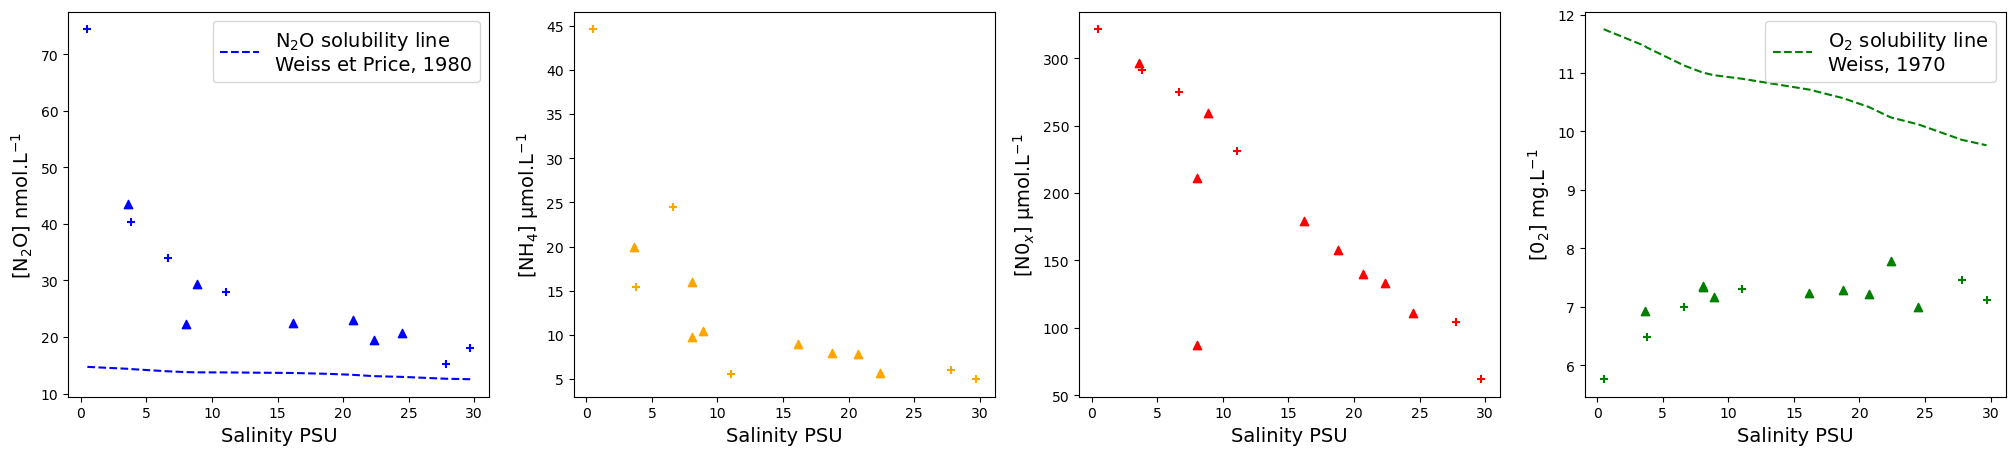

In [27]:
import numpy_indexed as npi
fig, ax = plt.subplots(nrows = 1, ncols=4, figsize=(25,5))

#### first line ####
for i in range(len(Smeas)):
    ax[0].scatter(Smeas[i], NmeasNan[i], c='blue' , marker=m[i])
    ax[0].set_xlabel('Salinity PSU', fontsize=14)
    ax[0].set_ylabel('[N$_2$O] nmol.L$^{-1}$', fontsize=14)

    ax[1].scatter(Smeas[i], NhmeasNan[i], c='orange', marker=m[i])
    ax[1].set_xlabel('Salinity PSU', fontsize=14)
    ax[1].set_ylabel('[NH$_4$] µmol.L$^{-1}$', fontsize=14)

    ax[2].scatter(Smeas[i], NOmeasNan[i], c='r', marker=m[i])
    ax[2].set_xlabel('Salinity PSU', fontsize=14)
    ax[2].set_ylabel('[N0$_x$] µmol.L$^{-1}$', fontsize=14)

    ax[3].scatter(Smeas[i], Omeas[i], c='green', marker=m[i])
    ax[3].set_xlabel('Salinity PSU', fontsize=14)
    ax[3].set_ylabel('[0$_2$] mg.L$^{-1}$', fontsize=14)

sort = np.argsort(np.array(Smeas))
sortSali = np.sort(Smeas)
    
ax[0].plot(sortSali, satN2O[sort], c='blue', ls='--', label='N$_2$O solubility line\nWeiss et Price, 1980')
ax[0].legend(fontsize=14)
ax[3].plot(sortSali, satO2[sort], c='green', ls='--', label='O$_2$ solubility line\nWeiss, 1970')
ax[3].legend(fontsize=14)

## N2O trend

In [28]:
cond = np.isfinite(NmeasNan)
tS = np.extract(cond,Smeas)
tN2O = np.extract(cond,NmeasNan)

In [29]:
from sklearn.linear_model import LinearRegression

regN2O = LinearRegression().fit(np.log(tS.reshape(-1, 1))  , (tN2O).reshape(-1, 1) )

In [30]:
tSpred = np.arange(0.5,np.log(30),.05).reshape(-1, 1)
predN2O = regN2O.predict(tSpred)

In [31]:
regN2O.coef_[0][0], regN2O.intercept_[0]

(-13.447844657395281, 60.359959027899954)

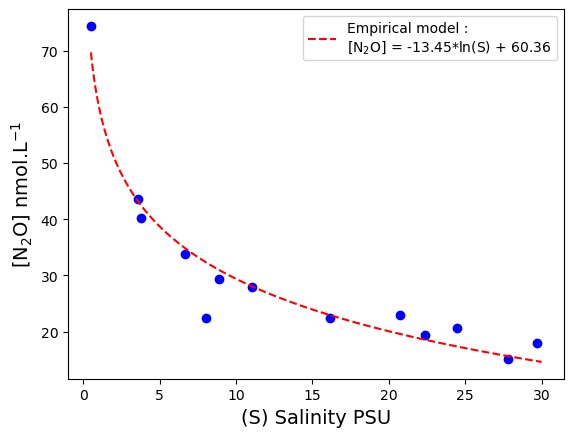

In [32]:
plt.scatter(tS, tN2O, c='blue')
tSlpred = np.exp(tSpred)

XXX = np.arange(0.5,30.1,.1)

AAA = (regN2O.coef_[0][0]*np.log(XXX)+regN2O.intercept_[0])
plt.plot(XXX,AAA,c='r',ls='--', label='Empirical model :\n[N$_2$O] = %.2f*ln(S) + %.2f' %(regN2O.coef_[0][0], regN2O.intercept_[0]))
#plt.plot(tSlpred,predN2O,c='r',ls='--', label='Empirical model :\ny= %.2f*ln(S) + %.2f' %(regN2O.coef_[0][0], regN2O.intercept_[0]))
plt.xlabel('(S) Salinity PSU', fontsize=14)
#plt.xscale('log')
plt.ylabel('[N$_2$O] nmol.L$^{-1}$', fontsize=14)
plt.legend()

### Influence of wind

In [33]:
modFlux1 = []
modFlux3 = []
modFlux6 = []
for i in range(len(predN2O)) :
    N2O = predN2O[i]/1e9 #reconvert in mol/L
    Sali = tSlpred[i]
    for wi in [1,3,6] :
        f = Wanninkhof(N2O,7,Sali,u=wi)
        f = f*3600*10**6 #convert in µmol.m**-2.hour**-1
        if wi == 1 :
            modFlux1.append(f)
        elif wi== 3:
            modFlux3.append(f)
        elif wi== 6 :
            modFlux6.append(f)

[1.46559348e-08] mol.L
[13.45648462] µmol/m²/day
[1.5574635e-10] mol/m²/s
[1.46559348e-08] mol.L
[24.9906143] µmol/m²/day
[2.89243221e-10] mol/m²/s
[1.46559348e-08] mol.L
[63.91830195] µmol/m²/day
[7.39795161e-10] mol/m²/s
[1.46488783e-08] mol.L
[13.22680126] µmol/m²/day
[1.53087978e-10] mol/m²/s
[1.46488783e-08] mol.L
[24.56405949] µmol/m²/day
[2.84306244e-10] mol/m²/s
[1.46488783e-08] mol.L
[62.827306] µmol/m²/day
[7.27167893e-10] mol/m²/s
[1.46414637e-08] mol.L
[12.99724153] µmol/m²/day
[1.50431036e-10] mol/m²/s
[1.46414637e-08] mol.L
[24.13773428] µmol/m²/day
[2.79371925e-10] mol/m²/s
[1.46414637e-08] mol.L
[61.73689729] µmol/m²/day
[7.14547422e-10] mol/m²/s
[1.46336731e-08] mol.L
[12.76781164] µmol/m²/day
[1.47775598e-10] mol/m²/s
[1.46336731e-08] mol.L
[23.7116502] µmol/m²/day
[2.74440396e-10] mol/m²/s
[1.46336731e-08] mol.L
[60.64710531] µmol/m²/day
[7.01934089e-10] mol/m²/s
[1.46254874e-08] mol.L
[12.5385181] µmol/m²/day
[1.45121737e-10] mol/m²/s
[1.46254874e-08] mol.L
[23.2858

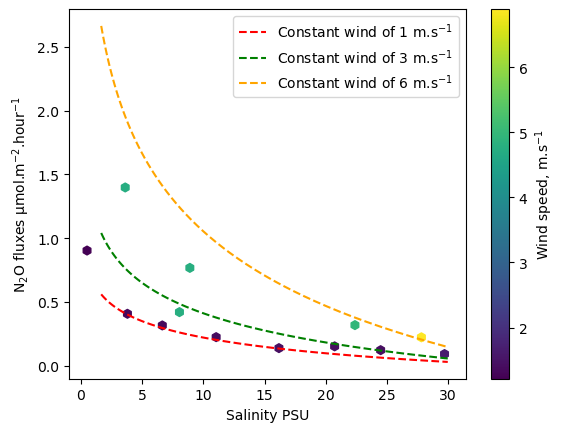

In [34]:
fig, ax = plt.subplots()

ax.plot(tSlpred,modFlux1, c='r', ls='--', label='Constant wind of 1 m.s$^{-1}$')
ax.plot(tSlpred,modFlux3, c='g', ls='--', label='Constant wind of 3 m.s$^{-1}$')
ax.plot(tSlpred,modFlux6, c='orange',ls='--', label='Constant wind of 6 m.s$^{-1}$')

a1 = ax.scatter(Smeas, Flux,c=np.array(windDay),marker='h',s=40)

plt.colorbar(a1, ax=ax, label='Wind speed, m.s$^{-1}$')
plt.xlabel('Salinity PSU')
plt.ylabel('N$_2$O fluxes µmol.m$^{-2}$.hour$^{-1}$')
plt.legend()

### Influence of temperature

In [35]:
modFluxT3 = []
modFluxT7 = []
modFluxT11 = []
for i in range(len(predN2O)) :
    N2O = predN2O[i]/1e9 #reconvert in mol/L
    Sali = tSlpred[i]
    for Ti in [3,7,11] :
        f = Wanninkhof(N2O,Ti,Sali,u=3)
        f = f*3600*10**6 #convert in µmol.m**-2.hour**-1
        if Ti == 3 :
            modFluxT3.append(f)
        elif Ti== 7:
            modFluxT7.append(f)
        elif Ti== 11 :
            modFluxT11.append(f)

[1.71667533e-08] mol.L
[20.52162753] µmol/m²/day
[2.37518837e-10] mol/m²/s
[1.46559348e-08] mol.L
[24.9906143] µmol/m²/day
[2.89243221e-10] mol/m²/s
[1.26241409e-08] mol.L
[29.79715185] µmol/m²/day
[3.44874443e-10] mol/m²/s
[1.71582179e-08] mol.L
[20.14806868] µmol/m²/day
[2.33195239e-10] mol/m²/s
[1.46488783e-08] mol.L
[24.56405949] µmol/m²/day
[2.84306244e-10] mol/m²/s
[1.26182448e-08] mol.L
[29.31290981] µmol/m²/day
[3.39269789e-10] mol/m²/s
[1.71492495e-08] mol.L
[19.77475351] µmol/m²/day
[2.28874462e-10] mol/m²/s
[1.46414637e-08] mol.L
[24.13773428] µmol/m²/day
[2.79371925e-10] mol/m²/s
[1.26120493e-08] mol.L
[28.82888524] µmol/m²/day
[3.33667653e-10] mol/m²/s
[1.71398263e-08] mol.L
[19.40169423] µmol/m²/day
[2.24556646e-10] mol/m²/s
[1.46336731e-08] mol.L
[23.7116502] µmol/m²/day
[2.74440396e-10] mol/m²/s
[1.26055394e-08] mol.L
[28.34508908] µmol/m²/day
[3.28068161e-10] mol/m²/s
[1.71299256e-08] mol.L
[19.02890369] µmol/m²/day
[2.20241941e-10] mol/m²/s
[1.46254874e-08] mol.L
[23.

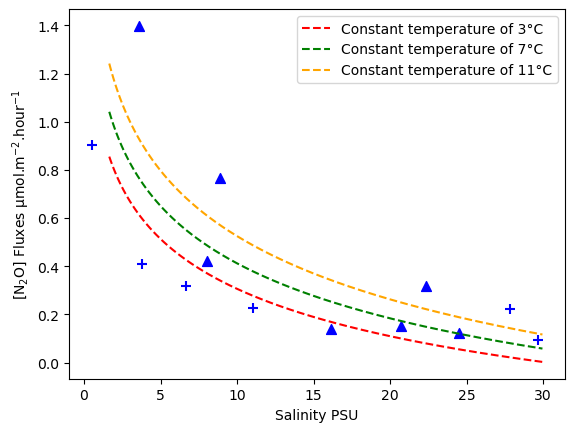

In [36]:
plt.plot(tSlpred,modFluxT3, c='r', ls='--', label='Constant temperature of 3°C')
plt.plot(tSlpred,modFluxT7, c='g', ls='--', label='Constant temperature of 7°C')
plt.plot(tSlpred,modFluxT11, c='orange',ls='--', label='Constant temperature of 11°C')

for i in range(len(Smeas)):
    plt.scatter(Smeas[i], Flux[i],marker=m[i],c='blue',s=50)

plt.xlabel('Salinity PSU')
plt.ylabel('[N$_2$O] Fluxes µmol.m$^{-2}$.hour$^{-1}$')
plt.legend()

### Global plot

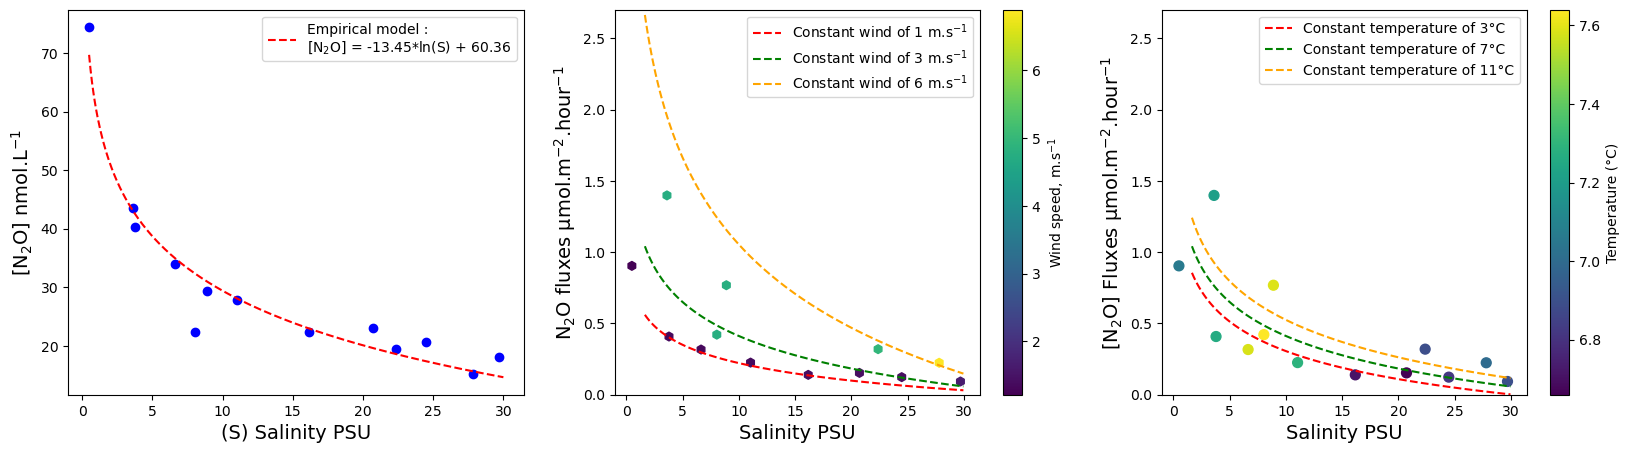

In [64]:
fig, ax = plt.subplots(ncols=3, figsize=(20,5))

#### graph left ####
ax[0].scatter(tS, tN2O, c='blue')
ax[0].plot(XXX,AAA,c='r',ls='--', label='Empirical model :\n[N$_2$O] = %.2f*ln(S) + %.2f' %(regN2O.coef_[0][0], regN2O.intercept_[0]))
#plt.plot(tSlpred,predN2O,c='r',ls='--', label='Empirical model :\ny= %.2f*ln(S) + %.2f' %(regN2O.coef_[0][0], regN2O.intercept_[0]))
ax[0].set_xlabel('(S) Salinity PSU', fontsize=14)
#plt.xscale('log')
ax[0].set_ylabel('[N$_2$O] nmol.L$^{-1}$', fontsize=14)
ax[0].legend()

#### graph center ####

ax[1].plot(tSlpred,modFlux1, c='r', ls='--', label='Constant wind of 1 m.s$^{-1}$')
ax[1].plot(tSlpred,modFlux3, c='g', ls='--', label='Constant wind of 3 m.s$^{-1}$')
ax[1].plot(tSlpred,modFlux6, c='orange',ls='--', label='Constant wind of 6 m.s$^{-1}$')

a1 = ax[1].scatter(Smeas, Flux,c=np.array(windDay),marker='h',s=40)

plt.colorbar(a1, ax=ax[1], label='Wind speed, m.s$^{-1}$', orientation='vertical')
ax[1].set_xlabel('Salinity PSU', fontsize=14)
ax[1].set_ylabel('N$_2$O fluxes µmol.m$^{-2}$.hour$^{-1}$', fontsize=14)
ax[1].set_ylim(0,2.7)
ax[1].legend()

#### graph right ####

ax[2].plot(tSlpred,modFluxT3, c='r', ls='--', label='Constant temperature of 3°C')
ax[2].plot(tSlpred,modFluxT7, c='g', ls='--', label='Constant temperature of 7°C')
ax[2].plot(tSlpred,modFluxT11, c='orange',ls='--', label='Constant temperature of 11°C')

a2 = ax[2].scatter(Smeas, Flux,c=df['Tmean (°C)'],s=50)
plt.colorbar(a2, ax=ax[2],label = 'Temperature (°C)', orientation='vertical')

ax[2].set_xlabel('Salinity PSU', fontsize=14)
ax[2].set_ylabel('[N$_2$O] Fluxes µmol.m$^{-2}$.hour$^{-1}$',fontsize=14)
ax[2].set_ylim(0,2.7)
ax[2].legend()

In [67]:
np.array(modFlux1) - np.array(modFlux6)

array([[-2.10257572],
       [-2.0666877 ],
       [-2.03081899],
       [-1.99497057],
       [-1.95914345],
       [-1.92333871],
       [-1.88755746],
       [-1.85180087],
       [-1.81607017],
       [-1.78036666],
       [-1.74469169],
       [-1.70904667],
       [-1.6734331 ],
       [-1.63785252],
       [-1.60230657],
       [-1.56679695],
       [-1.53132546],
       [-1.49589396],
       [-1.46050442],
       [-1.42515888],
       [-1.38985949],
       [-1.3546085 ],
       [-1.31940824],
       [-1.28426119],
       [-1.24916988],
       [-1.21413702],
       [-1.17916538],
       [-1.14425789],
       [-1.1094176 ],
       [-1.07464769],
       [-1.03995146],
       [-1.00533238],
       [-0.97079404],
       [-0.93634019],
       [-0.90197472],
       [-0.86770168],
       [-0.83352531],
       [-0.79944996],
       [-0.76548018],
       [-0.73162069],
       [-0.69787637],
       [-0.66425228],
       [-0.63075365],
       [-0.59738589],
       [-0.56415459],
       [-0

In [66]:
np.array(modFluxT11) - np.array(modFluxT3)

array([[0.38648018],
       [0.38186838],
       [0.37725549],
       [0.37264145],
       [0.36802621],
       [0.36340971],
       [0.35879189],
       [0.35417267],
       [0.349552  ],
       [0.3449298 ],
       [0.34030599],
       [0.33568051],
       [0.33105326],
       [0.32642416],
       [0.32179312],
       [0.31716005],
       [0.31252485],
       [0.30788742],
       [0.30324765],
       [0.29860543],
       [0.29396064],
       [0.28931317],
       [0.28466289],
       [0.28000966],
       [0.27535335],
       [0.27069382],
       [0.26603092],
       [0.2613645 ],
       [0.25669439],
       [0.25202043],
       [0.24734246],
       [0.24266028],
       [0.23797372],
       [0.23328258],
       [0.22858668],
       [0.2238858 ],
       [0.21917973],
       [0.21446826],
       [0.20975117],
       [0.20502822],
       [0.20029919],
       [0.19556383],
       [0.19082189],
       [0.18607314],
       [0.18131731],
       [0.17655414],
       [0.17178337],
       [0.167

Text(0, 0.5, '[N$_2$O] Fluxes µmol.m$^{-2}$.hour$^{-1}$')

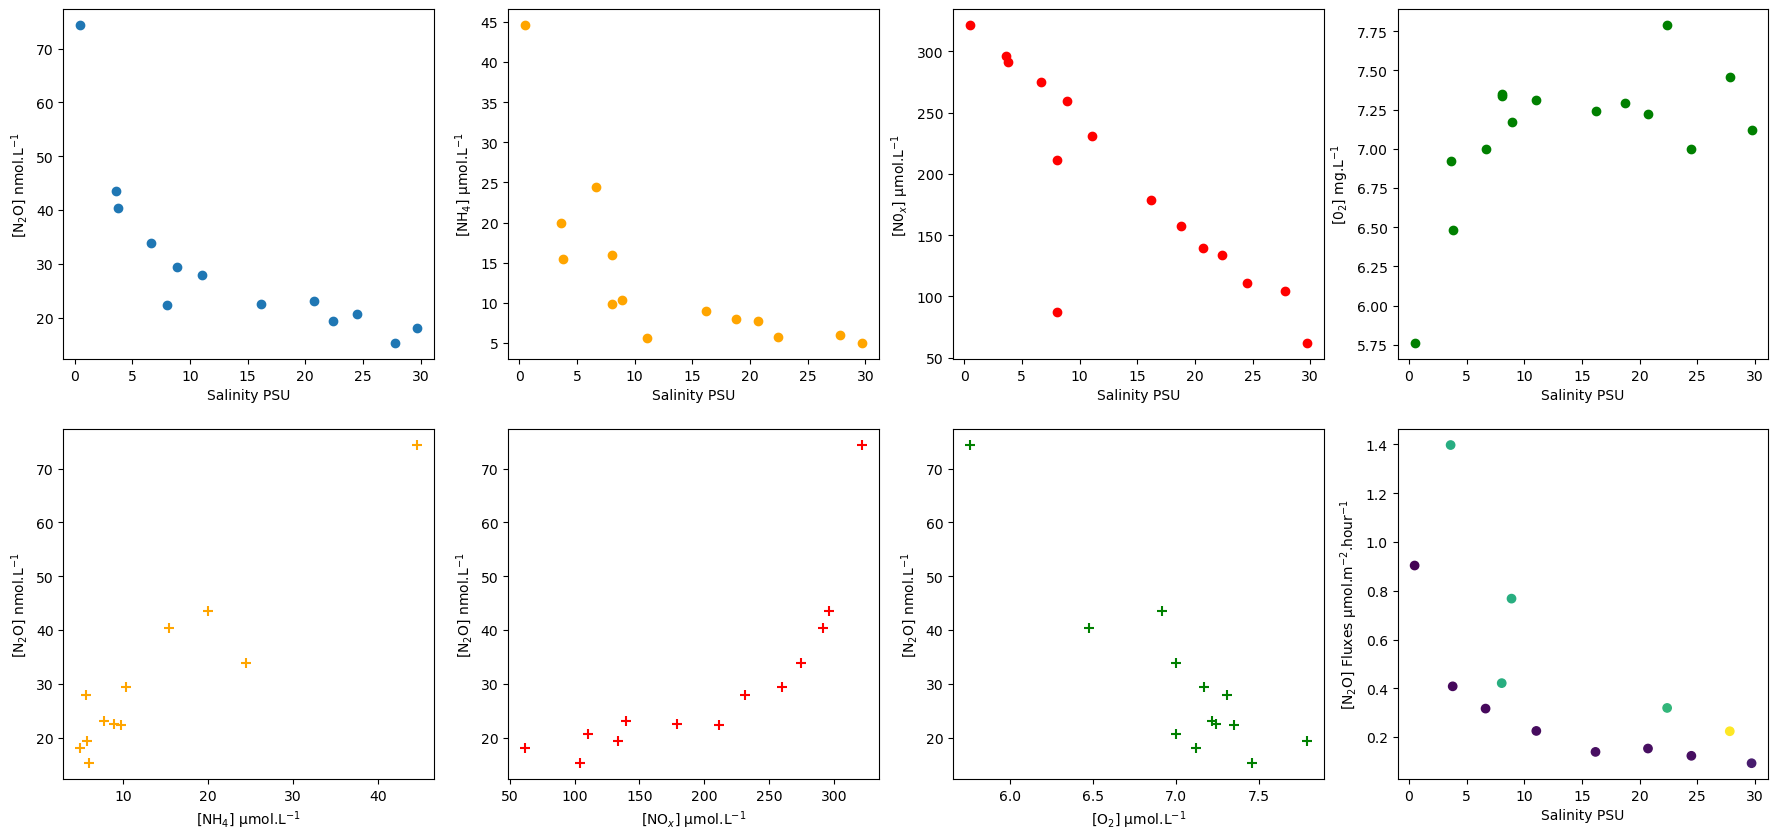

In [38]:
fig, ax = plt.subplots(nrows = 2, ncols=4, figsize=(22,10))

#### first line ####

ax[0][0].scatter(Smeas, NmeasNan)
ax[0][0].set_xlabel('Salinity PSU')
ax[0][0].set_ylabel('[N$_2$O] nmol.L$^{-1}$')

ax[0][1].scatter(Smeas, NhmeasNan, c='orange')
ax[0][1].set_xlabel('Salinity PSU')
ax[0][1].set_ylabel('[NH$_4$] µmol.L$^{-1}$')

ax[0][2].scatter(Smeas, NOmeasNan, c='r')
ax[0][2].set_xlabel('Salinity PSU')
ax[0][2].set_ylabel('[N0$_x$] µmol.L$^{-1}$')

ax[0][3].scatter(Smeas, Omeas, c='green')
ax[0][3].set_xlabel('Salinity PSU')
ax[0][3].set_ylabel('[0$_2$] mg.L$^{-1}$')

#### second line ####

ax[1][0].scatter(NhmeasNan, NmeasNan, c='orange', marker='+', s=60)
ax[1][0].set_xlabel('[NH$_4$] µmol.L$^{-1}$')
ax[1][0].set_ylabel('[N$_2$O] nmol.L$^{-1}$')

ax[1][1].scatter(NOmeasNan, NmeasNan, c='r', marker = '+', s=60)
ax[1][1].set_xlabel('[NO$_x$] µmol.L$^{-1}$')
ax[1][1].set_ylabel('[N$_2$O] nmol.L$^{-1}$')

ax[1][2].scatter(Omeas, NmeasNan, c='green', marker='+', s=60)
ax[1][2].set_xlabel('[O$_2$] µmol.L$^{-1}$')
ax[1][2].set_ylabel('[N$_2$O] nmol.L$^{-1}$')

ax[1][3].scatter(Smeas, Flux,c=np.array(windDay))
ax[1][3].set_xlabel('Salinity PSU')
ax[1][3].set_ylabel('[N$_2$O] Fluxes µmol.m$^{-2}$.hour$^{-1}$')

In [39]:
out = np.array([df.Station, Flux])

In [40]:
dfout = pd.DataFrame(out.transpose(), columns=['Station','Flux µmol.m**-2.hour**-1']).to_csv('./flux_stations.csv')

## Validating the model

In [41]:
wilde_data = pd.read_csv('C:/Users/julie/OneDrive/Desktop/GloCoas/schelde_N2O_OCT78-Q46.5.csv')

In [42]:
wilde_data

,salinity,cNitrous
0,1.039926,13.281284
1,1.104921,7.812499
2,2.209842,13.281284
3,3.314763,3.906249
4,3.314763,3.906249
5,4.127205,9.375034
6,5.297121,9.375034
7,6.174560,14.843760
8,9.716804,249.218757
9,10.984214,187.500004


In [43]:
for a in wilde_data:
    print(a)

salinity
 cNitrous


Text(0, 0.5, '[N$_2$O] nmol.L$^{-1}$')

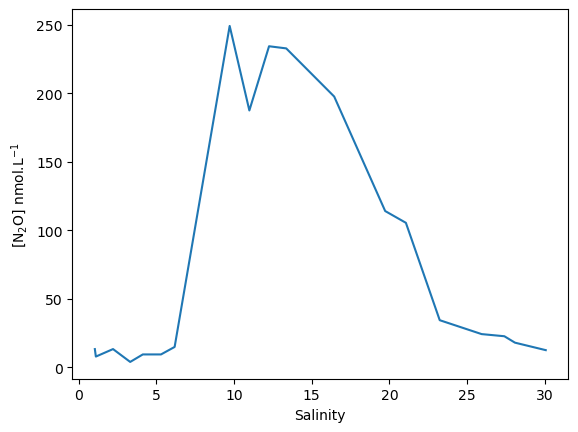

In [44]:
plt.plot(wilde_data.salinity, wilde_data[' cNitrous'])
plt.xlabel('Salinity')
plt.ylabel("[N$_2$O] nmol.L$^{-1}$")

In [45]:
Flux_wilde = []
for i in range(len(wilde_data[' cNitrous'])) :

    N2O = wilde_data[' cNitrous'][i]
    temp = 5
    Sali = wilde_data.salinity[i]

    if N2O != -999 :
        N2O *= 10**-9
        f = Wanninkhof(N2O,temp,Sali,u=5.3)
        f = f*3600*24*10**6 #convert in µmol.m**-2.hour**-1
        Flux_wilde.append(f) 
    else :
        Flux_wilde.append(-999)

1.5899190613782096e-08 mol.L
-3.3054120568704755 µmol/m²/day
-3.825708399155643e-11 mol/m²/s
1.589321025201686e-08 mol.L
-10.202839049121033 µmol/m²/day
-1.1808841492038231e-10 mol/m²/s
1.5791888034480757e-08 mol.L
-3.1699300553116556 µmol/m²/day
-3.668900526981083e-11 mol/m²/s
1.5691211652625925e-08 mol.L
-14.879887109808326 µmol/m²/day
-1.7222091562278156e-10 mol/m²/s
1.5691211652625925e-08 mol.L
-14.879887109808326 µmol/m²/day
-1.7222091562278156e-10 mol/m²/s
1.5617594638083304e-08 mol.L
-7.881959160998896 µmol/m²/day
-9.122637917822797e-11 mol/m²/s
1.5512192531280682e-08 mol.L
-7.7488767272762855 µmol/m²/day
-8.968607323236442e-11 mol/m²/s
1.5433607872783045e-08 mol.L
-0.7447518072949134 µmol/m²/day
-8.619812584431868e-12 mol/m²/s
1.5120386407623498e-08 mol.L
295.5764532827862 µmol/m²/day
3.421023764847062e-09 mol/m²/s
1.5009867114550308e-08 mol.L
217.7888836348352 µmol/m²/day
2.5207046716994816e-09 mol/m²/s
1.490015563906935e-08 mol.L
277.112544925802 µmol/m²/day
3.207321121826413

Text(0, 0.5, '[N$_2$O] µmol.m$^{-2}$.day$^{-1}$')

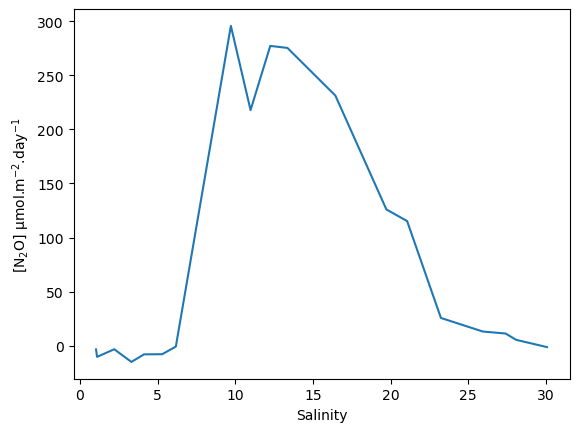

In [46]:
plt.plot(wilde_data.salinity, Flux_wilde)
plt.xlabel('Salinity')
plt.ylabel("[N$_2$O] µmol.m$^{-2}$.day$^{-1}$")

## Theorical dilution line

### Importing cross section of Toffolon, 2003

In [47]:
cross = pd.read_csv('./cross-section.csv')

In [48]:
cross

,distance,cross-section(m2)
0,6.019008,82689.329232
1,19.746567,57805.253360
2,32.840549,41576.504766
3,43.716995,26584.231076
4,52.059129,17774.343698
5,56.705381,14837.710642
6,60.506858,13292.115538
7,64.097144,9737.242081
8,67.581835,8964.444529
9,71.383312,7727.975521


Text(0, 0.5, 'Cross-section (m²)')

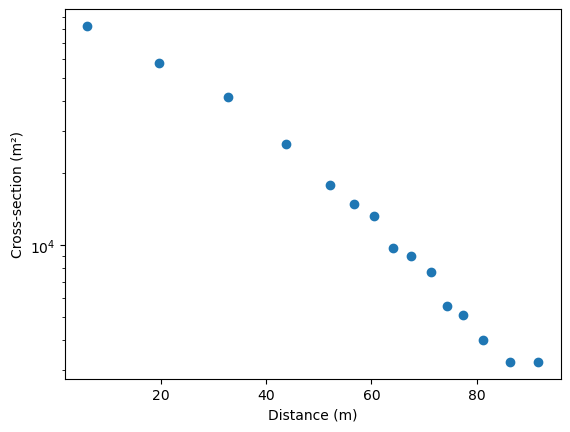

In [49]:
CS = cross['cross-section(m2)']
dist = cross.distance

plt.scatter(dist, CS)
plt.xlabel('Distance (m)')
plt.yscale('log')
plt.ylabel('Cross-section (m²)')

In [50]:
X = np.array(dist)

### Linear Regression

In [51]:
from sklearn.linear_model import LinearRegression

In [52]:
reg = LinearRegression().fit(np.array([dist]).reshape(-1, 1)  , np.log([CS]).reshape(-1, 1) )

In [53]:
xpred = np.arange(0,80,1).reshape(-1, 1)
pred = reg.predict(xpred)
predCross = np.exp(pred)

Text(0, 0.5, 'Cross-section (m²)')

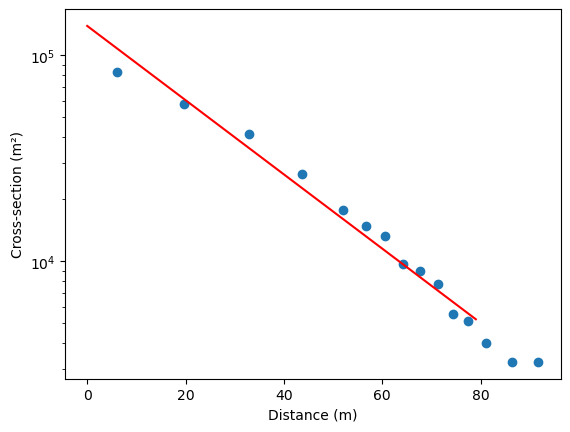

In [54]:
plt.scatter(dist, CS)
plt.plot(xpred,predCross, c='r')
plt.xlabel('Distance (m)')
plt.yscale('log')
plt.ylabel('Cross-section (m²)')

### Importing station kilometers

In [55]:
kilo = pd.read_csv('./station_kilometer.csv')

In [56]:
kilo

,fid,Station,Latitude (N),Longitude (E),Tmean (°C),Salinity PSU,N2O (nM),NH4 (µmol/L),NOx (µmol/L),O2 dissous winkler (mg/L),id,naam,km_afstand,n,distance,feature_x,feature_y,nearest_x,nearest_y
0,1,S01,"51,41603333",3.583233,7.00,27.81,15.23,5.98,104.17,7.46,0,NaN,1,1,0.000322,3.583233,51.416033,3.582913,51.416059
1,2,S01B,"51,41591667",3.571033,6.90,29.70,18.03,4.97,61.85,7.12,0,NaN,0,1,0.002263,3.571033,51.415917,3.568771,51.415997
2,3,T02,"51,34063333",4.269417,7.64,8.05,-999.00,16.00,87.10,7.34,0,z29,58,1,0.001330,4.269417,51.340633,4.269974,51.339426
3,4,S04,"51,34441667",3.846533,6.89,22.38,19.40,5.72,133.47,7.79,0,z10,20,1,0.009085,3.846533,51.344417,3.837494,51.343511
4,5,T04,"51,42988333",3.968567,6.71,16.17,22.43,8.95,179.04,7.24,0,u16,33,1,0.001535,3.968567,51.429883,3.970080,51.430140
5,6,T05,"51,3989",3.951933,6.60,18.77,-999.00,7.94,157.88,7.29,0,u14,29,1,0.002827,3.951933,51.398900,3.952518,51.401666
6,7,S09,"51,3716",4.082783,7.29,11.04,27.88,5.61,231.12,7.31,0,u21,43,1,0.005118,4.082783,51.371600,4.087643,51.369993
7,8,S12,"51,364",4.225633,7.58,6.64,33.88,24.47,274.70,7.00,0,z27,54,1,0.000340,4.225633,51.364000,4.225509,51.364317
8,9,S15,"51,31241667",4.272633,7.59,8.89,29.41,10.38,259.63,7.17,0,u30,61,1,0.000505,4.272633,51.312417,4.272605,51.312921
9,10,S15B,"51,32403333",4.274983,7.26,3.79,40.29,15.41,291.45,6.48,0,z30,60,1,0.002154,4.274983,51.324033,4.275051,51.321880


Text(0, 0.5, 'N$_2$O nM')

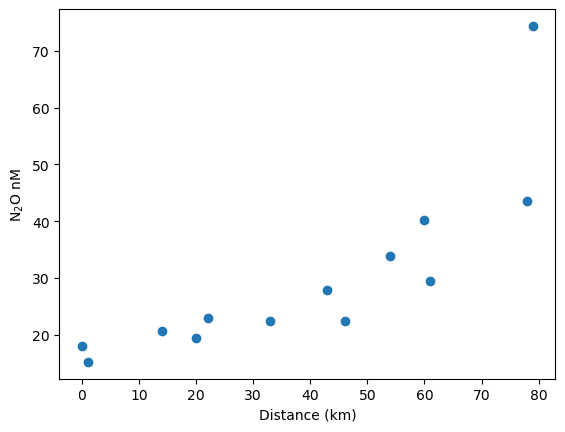

In [57]:
kiloN2O = np.where(kilo['N2O (nM)'] == -999, np.nan, kilo['N2O (nM)'])
plt.scatter(kilo.km_afstand,kiloN2O)
plt.xlabel("Distance (km)")
plt.ylabel('N$_2$O nM')

Text(0, 0.5, 'Salinity PSU')

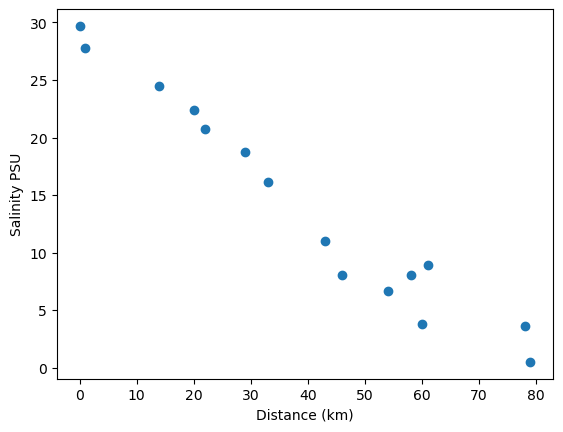

In [58]:
kiloN2O = np.where(kilo['Salinity PSU'] == -999, np.nan, kilo['Salinity PSU'])
plt.scatter(kilo.km_afstand,kiloN2O)
plt.xlabel("Distance (km)")
plt.ylabel('Salinity PSU')

In [59]:
IDXmaxKM = np.argmax(kilo.km_afstand)
depN2O = kiloN2O[IDXmaxKM]

In [60]:
diluLine = predCross/np.min(predCross)
cN2Odilu = depN2O/diluLine

Text(0, 0.5, 'N$_2$O nM')

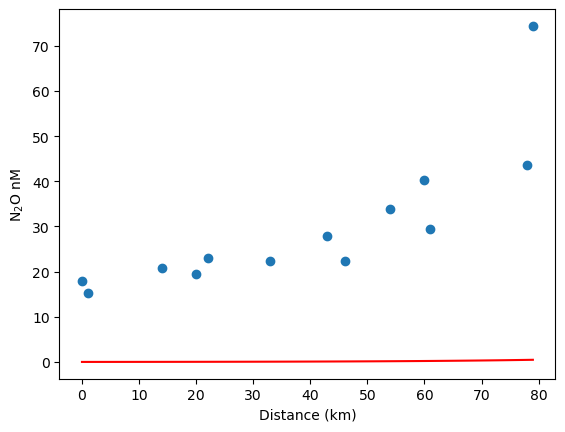

In [61]:
kiloN2O = np.where(kilo['N2O (nM)'] == -999, np.nan, kilo['N2O (nM)'])
plt.scatter(kilo.km_afstand,kiloN2O)
plt.plot(xpred,cN2Odilu,c='r')
plt.xlabel("Distance (km)")
plt.ylabel('N$_2$O nM')

Text(0, 0.5, 'NO$_x$ µM')

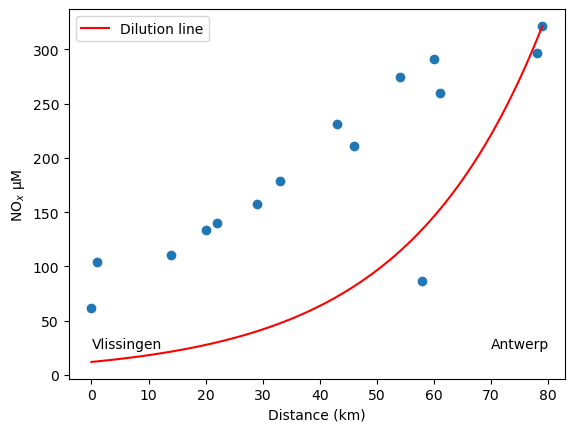

In [62]:
kiloNOx = np.where(kilo['NOx (µmol/L)'] == -999, np.nan, kilo['NOx (µmol/L)'])

IDXmaxKM = np.argmax(kilo.km_afstand)
depNOx = kiloNOx[IDXmaxKM]

diluLine = predCross/np.min(predCross)
cNOxdilu = depNOx/diluLine

plt.scatter(kilo.km_afstand,kiloNOx)
plt.text(0,25,'Vlissingen')
plt.text(70,25,'Antwerp')
plt.plot(xpred,cNOxdilu,c='r', label='Dilution line')
plt.legend()
plt.xlabel("Distance (km)")
plt.ylabel('NO$_x$ µM')

Text(0, 0.5, 'NH$_4$ (µmol/L)')

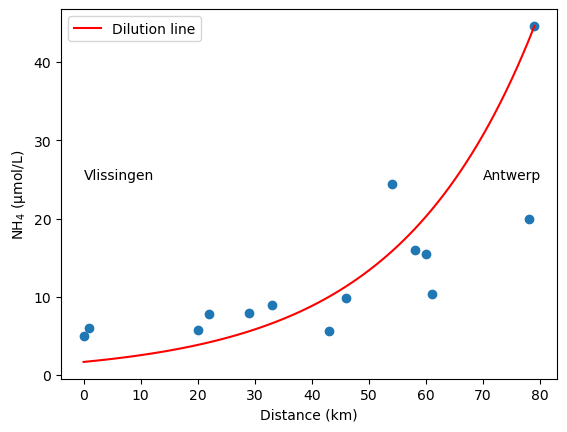

In [63]:
kiloNH4 = np.where(kilo['NH4 (µmol/L)'] == -999, np.nan, kilo['NH4 (µmol/L)'])

IDXmaxKM = np.argmax(kilo.km_afstand)
depNH4 = kiloNH4[IDXmaxKM]

diluLine = predCross/np.min(predCross)
cNH4dilu = depNH4/diluLine

plt.scatter(kilo.km_afstand,kiloNH4)
plt.text(0,25,'Vlissingen')
plt.text(70,25,'Antwerp')
plt.plot(xpred,cNH4dilu,c='r', label='Dilution line')
plt.legend()
plt.xlabel("Distance (km)")
plt.ylabel('NH$_4$ (µmol/L)')